In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

In [3]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
show = pd.read_csv('../01.Data_Collection/show_timetable.csv')

In [3]:
print(film.shape)
print(screen.shape)
print(show.shape)

(662, 41)
(39749, 20)
(13135726, 9)


In [4]:
film.sample()

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모
378,미스 프레지던트,20174645,2017-10-26,0,다큐멘터리,12세이상관람가,독립/예술영화,주식회사 단유필름,(주)인디플러그,1052,76,37339500.000000,5605,16901500,2304,칠곡 가시나들|미스 프레지던트|자백|쿼바디스|MB의 추억|트루맛쇼,김재환,20113064.000000,남자,-,-,-,-,-,-,-,-,-,김재환,김재환,김재환,20113064,남자,감독,칠곡 가시나들|미스 프레지던트|자백|쿼바디스|MB의 추억|트루맛쇼,박정희,박정희,20291218,남자,배우,미스 프레지던트


In [5]:
screen.sample()
# 일별 데이터

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
21994,20160503,분장,2017-09-27,2017-10-03,6 days 00:00:00.000000000,6,14,0.122000,12,12,0.400000,12,1601,4.700000,0.050000,12,553000,13438900,75,1840


In [6]:
show.sample()
# 상영 1타임별 데이터

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류,상영시간대
8757893,"12,000원",04관,13:45,2018-08-15,공작,160.000000,롯데시네마 신림,디지털,데이라이트


In [7]:
seats_count = screen.groupby('영화명')['좌석수'].sum().reset_index()
seats_count

,영화명,좌석수
0,0.0MHz,684373
1,1919 유관순,413427
2,1987,22964767
3,"1991, 봄",80315
4,1급기밀,1461685
5,22,42529
6,4등,552334
7,5.18 힌츠페터 스토리,186578
8,7년-그들이 없는 언론,200386
9,7년의 밤,4053982


In [8]:
len(seats_count)

662

In [9]:
film = film.merge(seats_count, how='left', on='영화명')
film.sample()

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모,좌석수
253,야근 대신 뜨개질,20154428,2016-11-17,3,다큐멘터리,12세이상관람가,독립/예술영화,(주)영화사 진진,(주)영화사 진진,158,10,7915500.000000,1128,6796500,943,"사막을 건너 호수를 지나|구르는 돌처럼|야근 대신 뜨개질|자, 이제 댄스타임|바람이...",박소현,20214911.000000,여자,-,-,-,-,-,-,-,-,-,박소현,박소현,박소현,20214911,여자,감독,"사막을 건너 호수를 지나|구르는 돌처럼|야근 대신 뜨개질|자, 이제 댄스타임|바람이...","김민수,지유나",나나,0,여자,배우,야근 대신 뜨개질,21064


In [10]:
film = film.rename(columns={'좌석수':'배정좌석수합계'})

In [11]:
ols('전국관객수 ~ 배정좌석수합계', film).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     7027.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:40   Log-Likelihood:                -9722.0
No. Observations:                 662   AIC:                         1.945e+04
Df Residuals:                     660   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.83e+05   2.53e+04     -7.238      0.000   -2.33e+05   -1.33e+05
배정좌석수합계        0.2873      0.003     83.828      0.000       0.281       0.294
==============================================================================
Omnibus:                      342.449   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9229.505
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                      20.958   Cond. No.                     8.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: 0.914  

In [12]:
show.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류,상영시간대
2908006,"10,000원",02관(SOUNDX / Sonictier),10:55,2019-08-19,"안녕, 티라노: 영원히, 함께",72.000000,CGV 여의도,디지털,브런치


In [13]:
time_count = show.groupby(['영화명', '상영시간대'])['좌석수'].sum().reset_index()
len(time_count)

4529

In [14]:
time_count.sample()

,영화명,상영시간대,좌석수
2524,소수의견,프라임1,312290.000000


In [15]:
time_count = time_count.rename(columns={'좌석수':'배정좌석수'})

In [16]:
seats = time_count.groupby('영화명')['배정좌석수'].sum().reset_index().rename(columns={'배정좌석수':'전체배정좌석수'})
seats.sample()

,영화명,전체배정좌석수
212,리얼,3686618.000000


In [17]:
time_count = time_count.merge(seats, how='left', on='영화명')

In [18]:
time_count['시간대별상영비율'] = time_count['배정좌석수'] / time_count['전체배정좌석수']

In [19]:
time_count.head()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율
0,0.0MHz,나이트,62310.000000,718957.000000,0.086667
1,0.0MHz,데이라이트,97854.000000,718957.000000,0.136105
2,0.0MHz,모닝,80499.000000,718957.000000,0.111966
3,0.0MHz,문라이트,114180.000000,718957.000000,0.158813
4,0.0MHz,브런치,89622.000000,718957.000000,0.124656


In [20]:
time_count[time_count['영화명']=='0.0MHz'].T

,0,1,2,3,4,5,6
영화명,0.0MHz,0.0MHz,0.0MHz,0.0MHz,0.0MHz,0.0MHz,0.0MHz
상영시간대,나이트,데이라이트,모닝,문라이트,브런치,프라임1,프라임2
배정좌석수,62310.000000,97854.000000,80499.000000,114180.000000,89622.000000,164271.000000,110221.000000
전체배정좌석수,718957.000000,718957.000000,718957.000000,718957.000000,718957.000000,718957.000000,718957.000000
시간대별상영비율,0.086667,0.136105,0.111966,0.158813,0.124656,0.228485,0.153307


In [21]:
time_count['상영시간대'].value_counts()

프라임2     661
프라임1     661
브런치      661
데이라이트    659
모닝       650
문라이트     625
나이트      612
Name: 상영시간대, dtype: int64

In [22]:
time_count.groupby('영화명')['상영시간대'].count().reset_index().sort_values('상영시간대')

,영화명,상영시간대
43,공포체험단 곤지암편,3
348,서태지밴드 콘서트투어 '콰이어트나이트',4
235,명령불복종 교사,4
240,무서운 집,4
51,국경의 왕,4
422,안나 카레니나,4
175,독도의 영웅들,5
628,하프,5
383,슈퍼레이서 엔지,5
611,파파 오랑후탄,5


In [23]:
time_count[time_count['영화명']=='공포체험단 곤지암편'].set_index('상영시간대').T

상영시간대,나이트,문라이트,프라임2
영화명,공포체험단 곤지암편,공포체험단 곤지암편,공포체험단 곤지암편
배정좌석수,507.000000,32968.000000,2088.000000
전체배정좌석수,35563.000000,35563.000000,35563.000000
시간대별상영비율,0.014256,0.927031,0.058713


In [24]:
film_list = time_count['영화명'].unique()

In [25]:
time_list = ['모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트']
time_list

['모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트']

In [26]:
time_count.head()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율
0,0.0MHz,나이트,62310.000000,718957.000000,0.086667
1,0.0MHz,데이라이트,97854.000000,718957.000000,0.136105
2,0.0MHz,모닝,80499.000000,718957.000000,0.111966
3,0.0MHz,문라이트,114180.000000,718957.000000,0.158813
4,0.0MHz,브런치,89622.000000,718957.000000,0.124656


In [27]:
time_count.shape

(4529, 5)

In [28]:
seat_by_time_rate = pd.DataFrame(columns=['영화명', '모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트'])
seat_by_time_rate

,영화명,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트


In [29]:
df = time_count[time_count['영화명']=='0.0MHz'].drop(['배정좌석수', '전체배정좌석수'], axis=1)
df

,영화명,상영시간대,시간대별상영비율
0,0.0MHz,나이트,0.086667
1,0.0MHz,데이라이트,0.136105
2,0.0MHz,모닝,0.111966
3,0.0MHz,문라이트,0.158813
4,0.0MHz,브런치,0.124656
5,0.0MHz,프라임1,0.228485
6,0.0MHz,프라임2,0.153307


In [30]:
for title in film_list:
    seats = dict()
    for time in time_list:
        df = time_count[time_count['영화명']==title].set_index('상영시간대').T
        
        if time in list(df.columns):
            seat_by_time = df.loc['시간대별상영비율', time]
            seats[time] = seat_by_time
        else: seats[time] = 0
        seats['영화명'] = title
    seat_by_time_rate = seat_by_time_rate.append(seats, ignore_index=True)

In [31]:
seat_by_time_rate

,영화명,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트
0,0.0MHz,0.111966,0.124656,0.136105,0.228485,0.153307,0.086667,0.158813
1,1919 유관순,0.172319,0.189425,0.220633,0.180487,0.116182,0.075742,0.045212
2,1987,0.119249,0.151269,0.167957,0.181964,0.194494,0.068731,0.116336
3,"1991, 봄",0.035029,0.217926,0.202429,0.286579,0.202754,0.009734,0.045549
4,1급기밀,0.134586,0.154422,0.163863,0.169566,0.186665,0.068984,0.121914
5,22,0.068578,0.482072,0.154457,0.136751,0.080038,0.045805,0.032299
6,4등,0.146819,0.205918,0.178467,0.173525,0.147345,0.056349,0.091577
7,5.18 힌츠페터 스토리,0.230661,0.235820,0.153303,0.150177,0.138602,0.041553,0.049885
8,7년-그들이 없는 언론,0.075488,0.217308,0.210687,0.245529,0.164525,0.028680,0.057784
9,7년의 밤,0.129513,0.176125,0.177790,0.176480,0.190389,0.047163,0.102541


In [32]:
seat_by_time_rate.isnull().sum()

영화명      0
모닝       0
브런치      0
데이라이트    0
프라임1     0
프라임2     0
나이트      0
문라이트     0
dtype: int64

In [33]:
time_count.columns

Index(['영화명', '상영시간대', '배정좌석수', '전체배정좌석수', '시간대별상영비율'], dtype='object')

In [34]:
seat_by_time_rate = seat_by_time_rate.merge(time_count[['영화명','전체배정좌석수']], how='left', on='영화명').merge(film[['영화명', 'F-rated']], how='left', on='영화명').drop_duplicates()
seat_by_time_rate.shape

(662, 10)

In [35]:
seat_by_time_rate.sample()

,영화명,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트,전체배정좌석수,F-rated
159,걸캅스,0.110278,0.164526,0.181810,0.193193,0.193224,0.045677,0.111292,9015022.000000,1


In [36]:
data = seat_by_time_rate.groupby('F-rated')[time_list].median()
data

,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트
F-rated,,,,,,,
0,0.118693,0.177811,0.175987,0.182930,0.178144,0.052184,0.101384
1,0.123108,0.204838,0.182053,0.181700,0.162058,0.041553,0.076158
2,0.116810,0.212972,0.184144,0.187849,0.159825,0.034393,0.070348
3,0.078804,0.241401,0.206845,0.213331,0.160394,0.015849,0.035296


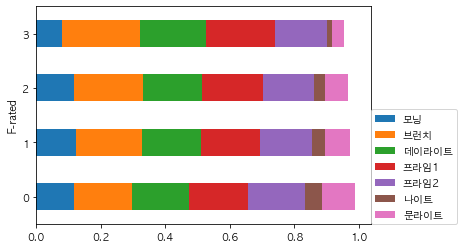

In [37]:
data.plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

In [38]:
data['합계'] = data['모닝'] + data['브런치'] + data['데이라이트'] + data['프라임1'] + data['프라임2'] + data['문라이트'] + data['나이트']

In [39]:
data

,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트,합계
F-rated,,,,,,,,
0,0.118693,0.177811,0.175987,0.182930,0.178144,0.052184,0.101384,0.987133
1,0.123108,0.204838,0.182053,0.181700,0.162058,0.041553,0.076158,0.971468
2,0.116810,0.212972,0.184144,0.187849,0.159825,0.034393,0.070348,0.966340
3,0.078804,0.241401,0.206845,0.213331,0.160394,0.015849,0.035296,0.951921


예상한 것과 다르게 상영시간대는 의미있는 변수가 아니었다.  
같은 영화를 모든 시간대에 고르게 상영하는 편. (0이 가장 고르다)  
조조는 오히려 흥행하는 블록버스터 같은 것 틀어줌.  

In [40]:
time_count.sample()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율
798,나홀로 휴가,데이라이트,38977.000000,274835.000000,0.141820


In [41]:
time_count = time_count.merge(film[['영화명', '전국관객수', 'F-rated']], how='left', on='영화명')

In [42]:
time_count.sample()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F-rated
1036,다이빙벨 그후,프라임1,12583.000000,89609.000000,0.140421,2981,0


In [43]:
time_group = time_count.groupby('F-rated')[['전체배정좌석수', '전국관객수']].mean().reset_index()

In [44]:
time_group.corr()

,F-rated,전체배정좌석수,전국관객수
F-rated,1.000000,-0.872985,-0.938717
전체배정좌석수,-0.872985,1.000000,0.968273
전국관객수,-0.938717,0.968273,1.000000


In [45]:
time_count = time_count.rename(columns={'F-rated':'F등급'})

In [46]:
len(time_count)

4529

# X: F등급, y: 전체배정좌석수

In [47]:
ols('전체배정좌석수 ~ C(F등급)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     57.66
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.43e-36
Time:                        20:51:56   Log-Likelihood:                -77096.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4525   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.225e+06   1.23e+05     34.242      0.000    3.98e+06    4.47e+06
C(F등급)[T.1] -1.982e+06   2.01e+05     -9.841      0.000   -2.38e+06   -1.59e+06
C(F등급)[T.2]   -1.3e+06   3.13e+05     -4.153      0.000   -1.91e+06   -6.86e+05
C(F등급)[T.3] -3.699e+06   3.49e+05    -10.588      0.000   -4.38e+06   -3.01e+06
==============================================================================
Omnibus:                     2729.808   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25518.194
Skew:                           2.810   Prob(JB):                         0.00
Kurtosis:                      13.181   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

전체배정좌석수는 F-0 > F-2 > F-1 > F-3 순으로 많다.  
F-3일 때 급격하게 내려감.  
y(배정좌석수)가 큰 수라서 계수도 크다 -> 0~1 사이로 scaling을 해라 (표준화: min-max scaler 등 종류가 많다)

# X: 전체배정좌석수, y: 전국관객수

In [48]:
ols('전국관객수 ~ 전체배정좌석수', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 4.089e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:56   Log-Likelihood:                -66894.
No. Observations:                4529   AIC:                         1.338e+05
Df Residuals:                    4527   BIC:                         1.338e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.913e+05   1.06e+04    -18.119      0.000   -2.12e+05   -1.71e+05
전체배정좌석수        0.3101      0.002    202.210      0.000       0.307       0.313
==============================================================================
Omnibus:                     2322.236   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72771.966
Skew:                           1.845   Prob(JB):                         0.00
Kurtosis:                      22.288   Cond. No.                     7.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

배정좌석수의 30% 정도만 좌석이 찬다.  
R제곱 값이 0.9로 전체배정좌석수가 전국관객수의 90%를 설명한다.  
프라임시간대 배정좌석수로만 봤을 때는 coef = 0.3691

# X: 전체배정좌석수, y: 전국관객수 (F등급별)

In [49]:
time_count.sample()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급
4408,헬머니,모닝,332507.000000,2998092.000000,0.110906,519983,1


In [50]:
# F-0
ols('전국관객수 ~ 전체배정좌석수', time_count[time_count['F등급']==0]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.750e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:56   Log-Likelihood:                -34891.
No. Observations:                2350   AIC:                         6.979e+04
Df Residuals:                    2348   BIC:                         6.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.372e+05   1.63e+04    -14.594      0.000   -2.69e+05   -2.05e+05
전체배정좌석수        0.3233      0.002    165.832      0.000       0.319       0.327
==============================================================================
Omnibus:                      852.898   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14784.990
Skew:                           1.253   Prob(JB):                         0.00
Kurtosis:                      15.030   Cond. No.                     9.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# F-1
ols('전국관객수 ~ 전체배정좌석수', time_count[time_count['F등급']==1]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     8123.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:56   Log-Likelihood:                -20742.
No. Observations:                1412   AIC:                         4.149e+04
Df Residuals:                    1410   BIC:                         4.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.493e+05   1.71e+04     -8.717      0.000   -1.83e+05   -1.16e+05
전체배정좌석수        0.2973      0.003     90.127      0.000       0.291       0.304
==============================================================================
Omnibus:                     1327.051   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96553.662
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      42.653   Cond. No.                     5.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# F-2
ols('전국관객수 ~ 전체배정좌석수', time_count[time_count['F등급']==2]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2926.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          5.65e-194
Time:                        20:51:56   Log-Likelihood:                -6110.1
No. Observations:                 432   AIC:                         1.222e+04
Df Residuals:                     430   BIC:                         1.223e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.76e+04   1.92e+04     -1.436      0.152   -6.54e+04    1.02e+04
전체배정좌석수        0.1911      0.004     54.095      0.000       0.184       0.198
==============================================================================
Omnibus:                      191.375   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1993.729
Skew:                           1.610   Prob(JB):                         0.00
Kurtosis:                      13.020   Cond. No.                     6.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# F-3
ols('전국관객수 ~ 전체배정좌석수', time_count[time_count['F등급']==3]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     4725.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          8.60e-199
Time:                        20:51:56   Log-Likelihood:                -4145.7
No. Observations:                 335   AIC:                             8295.
Df Residuals:                     333   BIC:                             8303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.451e+04   3448.711     -4.208      0.000   -2.13e+04   -7729.405
전체배정좌석수        0.1858      0.003     68.736      0.000       0.181       0.191
==============================================================================
Omnibus:                       68.271   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.349
Skew:                          -0.169   Prob(JB):                    3.53e-246
Kurtosis:                      11.993   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

coef: F-0 0.3233, F-1 0.2973, F-2 0.1911, F-3 0.1858  
-> F-3의 경우 상영횟수가 1 늘 때 관객수는 0.18명만 늘어난다.  
R제곱: F-0 0.921, F-1 0.852, F-2 0.872, F-3 0.934  
F-2와 F-3이 F-0, F-1에 비해 전체배정좌석수가 전국관객수에 미치는 영향이 작다.  
F-0의 경우 많은 좌석수 덕에 관객수가 늘어날 가능성이 높다는 뜻.  

# X: 감독1성별, 작가성별, 배우성별, y: 전체좌석배정수

In [54]:
time_count.sample()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급
4512,히말라야,브런치,3549029.000000,22905936.000000,0.154939,7759473,0


In [55]:
film.sample()

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모,배정좌석수합계
211,터널,20154910,2016-08-10,0,드라마,12세이상관람가,일반영화,"(주)어나더썬데이,(주)비에이엔터테인먼트",(주)쇼박스,113214,1105,57510324417.000000,7118592,14121558017,1675010,터널|끝까지 간다|애정결핍이 두 남자에게 미치는 영향|그놈은 멋있었다|오! 해피데이,김성훈,10004662.000000,남자,-,-,-,-,-,-,-,-,-,하정우,하정우,김성훈,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,배두나,오달수,김종수,임한빈,정민희,송민석,윤성민,이동진,이상희,최춘범,권승...",하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,22439695


In [56]:
time_count = time_count.merge(film[['감독1성별', '작가성별', '배우성별', '영화명']], how='left', on='영화명')

In [57]:
ols('전체배정좌석수 ~ C(감독1성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     51.15
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           9.93e-13
Time:                        20:51:56   Log-Likelihood:                -77155.
No. Observations:                4529   AIC:                         1.543e+05
Df Residuals:                    4527   BIC:                         1.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.466e+06   9.69e+04     35.768      0.000    3.28e+06    3.66e+06
C(감독1성별)[T.여자] -1.876e+06   2.62e+05     -7.152      0.000   -2.39e+06   -1.36e+06
==============================================================================
Omnibus:                     2790.893   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26672.349
Skew:                           2.887   Prob(JB):                         0.00
Kurtosis:                      13.393   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
ols('전체배정좌석수 ~ C(작가성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.33
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           5.01e-07
Time:                        20:51:56   Log-Likelihood:                -77168.
No. Observations:                4529   AIC:                         1.543e+05
Df Residuals:                    4527   BIC:                         1.544e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.465e+06   1.04e+05     33.457      0.000    3.26e+06    3.67e+06
C(작가성별)[T.여자] -1.064e+06   2.11e+05     -5.033      0.000   -1.48e+06    -6.5e+05
==============================================================================
Omnibus:                     2792.098   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26584.694
Skew:                           2.890   Prob(JB):                         0.00
Kurtosis:                      13.366   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
ols('전체배정좌석수 ~ C(배우성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           4.00e-33
Time:                        20:51:56   Log-Likelihood:                -77109.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4527   BIC:                         1.542e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.981e+06    1.1e+05     36.319      0.000    3.77e+06     4.2e+06
C(배우성별)[T.여자] -2.276e+06   1.88e+05    -12.087      0.000   -2.64e+06   -1.91e+06
==============================================================================
Omnibus:                     2728.170   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25398.479
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      13.150   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

감독, 작가, 배우 하나씩 봤을 때 모두 남자일 때가 좌석을 많이 배정받는다.  

In [60]:
ols('전체배정좌석수 ~ C(감독1성별) + C(작가성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     25.69
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           8.09e-12
Time:                        20:51:56   Log-Likelihood:                -77155.
No. Observations:                4529   AIC:                         1.543e+05
Df Residuals:                    4526   BIC:                         1.543e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.483e+06   1.03e+05     33.704      0.000    3.28e+06    3.69e+06
C(감독1성별)[T.여자] -1.767e+06   3.47e+05     -5.089      0.000   -2.45e+06   -1.09e+06
C(작가성별)[T.여자]  -1.339e+05   2.79e+05     -0.480      0.631   -6.81e+05    4.13e+05
==============================================================================
Omnibus:                     2789.264   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26622.926
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      13.382   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

작가 계수 절대값이 감독 계수 절대값보다 10배 이상 작다.

In [61]:
ols('전체배정좌석수 ~ C(감독1성별) * C(작가성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.93
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           2.31e-15
Time:                        20:51:56   Log-Likelihood:                -77145.
No. Observations:                4529   AIC:                         1.543e+05
Df Residuals:                    4525   BIC:                         1.543e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     3.439e+06   1.04e+05     33.196      0.000    3.24e+06    3.64e+06
C(감독1성별)[T.여자]                2.581e+06   1.03e+06      2.512      0.012    5.67e+05     4.6e+06
C(작가성별)[T.여자]                 2.098e+05   2.89e+05      0.726      0.468   -3.57e+05    7.76e+05
C(감독1성별)[T.여자]:C(작가성별)[T.여자] -4.906e+06   1.09e+06     -4.495      0.000   -7.05e+06   -2.77e+06
==============================================================================
Omnibus:                     2796.615   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27058.708
Skew:                           2.889   Prob(JB):                         0.00
Kurtosis:                      13.488   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

감독과 작가를 같이 넣으면 작가성별의 p값이 높다. -> 감독성별과 작가성별의 상관계수가 0.65로 너무 높아서 ols 돌렸을 때 계수가 큰 변수의 영향이 세서 상대적으로 계수가 작은 변수는 p값이 높아질 수 있다.

In [62]:
time_count[['감독1성별', '작가성별', '배우성별']] = time_count[['감독1성별', '작가성별', '배우성별']].applymap(lambda x: x.replace('남자','0').replace('여자','1'))

In [63]:
time_count.sample()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급,감독1성별,작가성별,배우성별
680,꾼,데이라이트,3742369.000000,20765407.000000,0.180221,4018341,0,0,0,0


In [64]:
time_count[['감독1성별', '작가성별', '배우성별']] = time_count[['감독1성별', '작가성별', '배우성별']].astype(int)

In [65]:
time_count.corr()

,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급,감독1성별,작가성별,배우성별
배정좌석수,1.000000,0.939589,0.085387,0.891581,-0.160558,-0.099509,-0.070114,-0.165894
전체배정좌석수,0.939589,1.000000,-0.019698,0.948852,-0.170914,-0.105700,-0.074598,-0.176808
시간대별상영비율,0.085387,-0.019698,1.000000,-0.015201,0.004079,-0.002543,0.001601,0.009042
전국관객수,0.891581,0.948852,-0.015201,1.000000,-0.165609,-0.110234,-0.084888,-0.155388
F등급,-0.160558,-0.170914,0.004079,-0.165609,1.000000,0.771360,0.789447,0.645031
감독1성별,-0.099509,-0.105700,-0.002543,-0.110234,0.771360,1.000000,0.655060,0.180111
작가성별,-0.070114,-0.074598,0.001601,-0.084888,0.789447,0.655060,1.000000,0.141949
배우성별,-0.165894,-0.176808,0.009042,-0.155388,0.645031,0.180111,0.141949,1.000000


In [66]:
ols('전체배정좌석수 ~ C(감독1성별) + C(배우성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     86.70
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.12e-37
Time:                        20:51:57   Log-Likelihood:                -77096.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4526   BIC:                         1.542e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.106e+06   1.12e+05     36.671      0.000    3.89e+06    4.33e+06
C(감독1성별)[T.1] -1.355e+06   2.63e+05     -5.147      0.000   -1.87e+06   -8.39e+05
C(배우성별)[T.1]  -2.099e+06   1.91e+05    -10.995      0.000   -2.47e+06   -1.72e+06
==============================================================================
Omnibus:                     2717.060   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25170.899
Skew:                           2.796   Prob(JB):                         0.00
Kurtosis:                      13.106   Cond. No.                         3.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
ols('전체배정좌석수 ~ C(감독1성별) * C(배우성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     57.84
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.10e-36
Time:                        20:51:57   Log-Likelihood:                -77096.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4525   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.115e+06   1.15e+05     35.869      0.000    3.89e+06    4.34e+06
C(감독1성별)[T.1]              -1.457e+06   3.78e+05     -3.856      0.000    -2.2e+06   -7.16e+05
C(배우성별)[T.1]                -2.13e+06   2.08e+05    -10.252      0.000   -2.54e+06   -1.72e+06
C(감독1성별)[T.1]:C(배우성별)[T.1]   1.99e+05   5.27e+05      0.378      0.706   -8.34e+05    1.23e+06
==============================================================================
Omnibus:                     2716.132   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25139.894
Skew:                           2.795   Prob(JB):                         0.00
Kurtosis:                      13.098   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
ols('전체배정좌석수 ~ C(작가성별) + C(배우성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     79.07
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.76e-34
Time:                        20:51:57   Log-Likelihood:                -77103.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4526   BIC:                         1.542e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.123e+06   1.17e+05     35.224      0.000    3.89e+06    4.35e+06
C(작가성별)[T.1] -7.209e+05   2.11e+05     -3.422      0.001   -1.13e+06   -3.08e+05
C(배우성별)[T.1] -2.183e+06    1.9e+05    -11.493      0.000   -2.56e+06   -1.81e+06
==============================================================================
Omnibus:                     2717.566   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25097.785
Skew:                           2.798   Prob(JB):                         0.00
Kurtosis:                      13.084   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

배우 계수 절대값보다 작가 계수 절대값이 작다.

In [69]:
ols('전체배정좌석수 ~ C(작가성별) * C(배우성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     53.98
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           2.82e-34
Time:                        20:51:57   Log-Likelihood:                -77101.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4525   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   4.19e+06   1.22e+05     34.316      0.000    3.95e+06    4.43e+06
C(작가성별)[T.1]              -1.063e+06   2.76e+05     -3.858      0.000    -1.6e+06   -5.23e+05
C(배우성별)[T.1]              -2.406e+06   2.22e+05    -10.817      0.000   -2.84e+06   -1.97e+06
C(작가성별)[T.1]:C(배우성별)[T.1]  8.227e+05   4.27e+05      1.926      0.054   -1.49e+04    1.66e+06
==============================================================================
Omnibus:                     2714.925   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25029.635
Skew:                           2.795   Prob(JB):                         0.00
Kurtosis:                      13.069   Cond. No.                         6.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
ols('전체배정좌석수 ~ C(작가성별) + C(배우성별) + C(감독1성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     57.79
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.17e-36
Time:                        20:51:57   Log-Likelihood:                -77096.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4525   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.11e+06   1.17e+05     35.160      0.000    3.88e+06    4.34e+06
C(작가성별)[T.1]  -3.628e+04   2.76e+05     -0.132      0.895   -5.77e+05    5.04e+05
C(배우성별)[T.1]  -2.098e+06   1.91e+05    -10.984      0.000   -2.47e+06   -1.72e+06
C(감독1성별)[T.1] -1.325e+06   3.45e+05     -3.841      0.000      -2e+06   -6.49e+05
==============================================================================
Omnibus:                     2716.704   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25159.063
Skew:                           2.795   Prob(JB):                         0.00
Kurtosis:                      13.103   Cond. No.                         5.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
ols('전체배정좌석수 ~ C(작가성별) * C(배우성별) * C(감독1성별)', time_count).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체배정좌석수   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     30.68
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           8.96e-42
Time:                        20:51:57   Log-Likelihood:                -77076.
No. Observations:                4529   AIC:                         1.542e+05
Df Residuals:                    4521   BIC:                         1.542e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                4.181e+06   1.22e+05     34.220      0.000    3.94e+06    4.42e+06
C(작가성별)[T.1]                            -5.244e+05   3.45e+05     -1.518      0.129    -1.2e+06    1.53e+05
C(배우성별)[T.1]                            -2.456e+06   2.22e+05    -11.050      0.000   -2.89e+06   -2.02e+06
C(감독1성별)[T.1]                            7.592e+05   1.13e+06      0.670      0.503   -1.46e+06    2.98e+06
C(작가성별)[T.1]:C(배우성별)[T.1]                2.431e+06    6.1e+05      3.988      0.000    1.24e+06    3.63e+06
C(작가성별)[T.1]:C(감독1성별)[T.1]              -2.015e+06   1.24e+06     -1.629      0.103   -4.44e+06     4.1e+05
C(배우성별)[T.1]:C(감독1성별)[T.1]               7.855e+06   2.53e+06      3.108      0.002     2.9e+06    1.28e+07
C(작가성별)[T.1]:C(배우성별)[T.1]:C(감독1성별)[T.1] -9.704e+06   2.64e+06     -3.678      0.000   -1.49e+07   -4.53e+06
==============================================================================
Omnibus:                     2734.122   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25894.734
Skew:                           2.810   Prob(JB):                         0.00
Kurtosis:                      13.278   Cond. No.                         48.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
screen.sample()

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
23692,20173581,기억의 밤,2017-11-29,2017-11-27,-2 days +00:00:00.000000000,-2,7,0.079000,16,6,0.200000,15,1981,88.400000,0.070000,11,8760000,27424000,1752,4903


In [73]:
film = film.merge(screen[['영화명', '좌석판매율']], how='left', on='영화명')

In [74]:
film.groupby('F-rated')['좌석판매율'].mean()

F-rated
0   22.341262
1   19.958372
2   25.095339
3   17.304865
Name: 좌석판매율, dtype: float64

In [75]:
film.groupby(['감독1성별', '작가성별', '배우성별'])['좌석판매율'].mean().reset_index()

,감독1성별,작가성별,배우성별,좌석판매율
0,남자,남자,남자,22.268158
1,남자,남자,여자,19.214839
2,남자,여자,남자,21.770142
3,남자,여자,여자,25.842697
4,여자,남자,남자,25.713169
5,여자,남자,여자,31.658716
6,여자,여자,남자,25.046212
7,여자,여자,여자,17.304865


In [76]:
time_count.groupby(['감독1성별', '작가성별', '배우성별'])['전체배정좌석수'].mean().reset_index()

,감독1성별,작가성별,배우성별,전체배정좌석수
0,0,0,0,4180941.111438
1,0,0,1,1725137.253398
2,0,1,0,3656506.473529
3,0,1,1,3631763.644172
4,1,0,0,4940173.750000
5,1,0,1,10339146.000000
6,1,1,0,2400541.778226
7,1,1,1,526597.262687


In [77]:
time_count[time_count['F등급']==2].sort_values('전체배정좌석수', ascending=False)

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급,감독1성별,작가성별,배우성별
1222,돈,프라임1,3936171.000000,20123467.000000,0.195601,3389035,2,1,1,0
1219,돈,모닝,2014610.000000,20123467.000000,0.100112,3389035,2,1,1,0
1221,돈,브런치,3366096.000000,20123467.000000,0.167272,3389035,2,1,1,0
1220,돈,문라이트,2214623.000000,20123467.000000,0.110052,3389035,2,1,1,0
1223,돈,프라임2,4118432.000000,20123467.000000,0.204658,3389035,2,1,1,0
1218,돈,데이라이트,3786269.000000,20123467.000000,0.188152,3389035,2,1,1,0
1217,돈,나이트,687266.000000,20123467.000000,0.034152,3389035,2,1,1,0
1541,말모이,나이트,776834.000000,15074050.000000,0.051535,2812444,2,1,1,0
1543,말모이,모닝,1677263.000000,15074050.000000,0.111268,2812444,2,1,1,0
1544,말모이,문라이트,1807077.000000,15074050.000000,0.119880,2812444,2,1,1,0


In [78]:
time_count['전체배정좌석수'].describe()

count       4529.000000
mean     3209715.685582
std      6093091.388647
min         2373.000000
25%        72495.000000
50%       362858.000000
75%      3124795.000000
max     49962395.000000
Name: 전체배정좌석수, dtype: float64

In [79]:
screen.sample()

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
16742,20150964,조작된 도시,2017-02-09,2017-04-06,56 days 00:00:00.000000000,56,1,0.014000,19,1,0.000000,17,36,97.200000,0.000000,23,210000,20137635587,35,2514833


In [139]:
time_count.head()

,영화명,상영시간대,배정좌석수,전체배정좌석수,시간대별상영비율,전국관객수,F등급,감독1성별,작가성별,배우성별
0,0.0MHz,나이트,62310.000000,718957.000000,0.086667,137294,1,0,0,1
1,0.0MHz,데이라이트,97854.000000,718957.000000,0.136105,137294,1,0,0,1
2,0.0MHz,모닝,80499.000000,718957.000000,0.111966,137294,1,0,0,1
3,0.0MHz,문라이트,114180.000000,718957.000000,0.158813,137294,1,0,0,1
4,0.0MHz,브런치,89622.000000,718957.000000,0.124656,137294,1,0,0,1


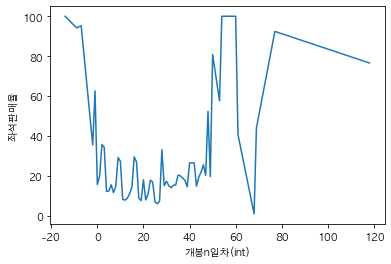

In [81]:
sns.lineplot(y='좌석판매율', x='개봉n일차(int)', data=screen[screen['영화명'] == '걸캅스'])

# 그룹별 X: F등급, y: 좌석판매율

필요한 컬럼
* 영화명
* F-rated
* 영화별 평균 좌석판매율
* 영화별 전체 배정좌석수
* 영화별 전체 관객수 (누적관객수)

In [5]:
film2 = film[['영화명', 'F-rated']].rename(columns={'F-rated':'F등급'})

In [6]:
screen2 = screen.groupby('영화명')['좌석판매율'].mean().reset_index().rename(columns={'좌석판매율':'평균좌석판매율'})

In [7]:
screen2.columns

Index(['영화명', '평균좌석판매율'], dtype='object')

In [8]:
show2 = show.groupby('영화명')['좌석수'].sum().reset_index().rename(columns={'좌석수':'전체배정좌석수'})

In [9]:
film_ols = film2.merge(screen2, how='left', on='영화명').merge(show2, how='left', on='영화명').drop_duplicates()
print(len(film_ols))
film_ols.head()

662


,영화명,F등급,평균좌석판매율,전체배정좌석수
0,워킹걸,1,28.760000,808885.000000
1,설해,0,15.222222,30247.000000
2,허삼관,0,28.446000,3726538.000000
3,오늘의 연애,0,24.178000,6708180.000000
4,고양이 장례식,0,21.158333,61897.000000


In [10]:
screen.sample()

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
26642,20170841,리틀 포레스트,2018-02-28,2018-04-28,59 days 00:00:00.000000000,59,1,0.051000,26,1,0.100000,26,40,35.000000,0.000000,29,84000,11914055185,14,1504164


In [51]:
len(screen)

39749

In [11]:
days = screen[screen['개봉n일차(int)']>=0]

In [14]:
days['개봉n일차(int)'].value_counts().reset_index().sort_values('index')

,index,개봉n일차(int)
0,0,663
3,1,660
5,2,658
1,3,660
4,4,659
2,5,660
6,6,657
10,7,648
7,8,650
8,9,650


In [15]:
first_week = days[days['개봉n일차(int)']<=6]
len(first_week)

4617

In [16]:
first_week.sample()

,영화코드,영화명,개봉일,점유율집계일,개봉n일차,개봉n일차(int),상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
8915,20152541,무수단,2016-03-03,2016-03-09,6 days 00:00:00.000000000,6,262,4.171000,5,175,7.800000,5,32551,2.900000,1.350000,5,7025000,124989400,951,15713


In [18]:
first_week = first_week.drop_duplicates()
first_week.shape

(4617, 20)

In [22]:
show.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류,상영시간대
2600777,"8,000원",03관,09:40,2018-11-23,성난황소,164.000000,CGV 대학로,디지털,모닝


In [24]:
num_seat = show.groupby('영화명')['좌석수'].sum().reset_index()
num_seat.sample()

,영화명,좌석수
81,극장판 프랭키와 친구들: 생명의 나무,367559.000000


In [25]:
first_week = first_week.merge(film[['영화명', 'F-rated']], how='left', on='영화명').merge(num_seat, how='left', on='영화명').rename(columns={'F-rated':'F등급', '좌석수':'총배정좌석수'}).drop_duplicates()

In [26]:
first_week.shape

(4617, 22)

In [27]:
g1 = pd.read_csv('prime_group1.csv')['영화명'].unique()
g2 = pd.read_csv('prime_group2.csv')['영화명'].unique()
g3 = pd.read_csv('prime_group3.csv')['영화명'].unique()
g4 = pd.read_csv('prime_group4.csv')['영화명'].unique()
g5 = pd.read_csv('prime_group5.csv')['영화명'].unique()

In [28]:
film_g1 = first_week[first_week['영화명'].isin(g1)]
film_g2 = first_week[first_week['영화명'].isin(g2)]
film_g3 = first_week[first_week['영화명'].isin(g3)]
film_g4 = first_week[first_week['영화명'].isin(g4)]
film_g5 = first_week[first_week['영화명'].isin(g5)]

In [29]:
len(film_g2)

1366

In [31]:
film_g3['개봉n일차(int)'].value_counts()

0    155
6    154
5    154
4    154
3    154
2    154
1    154
Name: 개봉n일차(int), dtype: int64

In [34]:
g1_ols = ols('좌석판매율 ~ F등급', film_g1).fit()
g1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.865
Date:                Tue, 10 Dec 2019   Prob (F-statistic):            0.00171
Time:                        23:06:12   Log-Likelihood:                -6060.4
No. Observations:                1654   AIC:                         1.212e+04
Df Residuals:                    1652   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1154      0.297     27.299      0.000       7.532       8.698
F등급           -0.7240      0.231     -3.141      0.002      -1.176      -0.272
==============================================================================
Omnibus:                     1465.308   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45156.940
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      27.216   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
g1_ols_c = ols('좌석판매율 ~ C(F등급)', film_g1).fit()
g1_ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.488
Date:                Tue, 10 Dec 2019   Prob (F-statistic):             0.0152
Time:                        23:06:45   Log-Likelihood:                -6060.1
No. Observations:                1654   AIC:                         1.213e+04
Df Residuals:                    1650   BIC:                         1.215e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2181      0.326     25.230      0.000       7.579       8.857
C(F등급)[T.1]    -1.1021      0.539     -2.044      0.041      -2.160      -0.045
C(F등급)[T.2]    -1.4976      0.871     -1.720      0.086      -3.205       0.210
C(F등급)[T.3]    -2.0673      0.758     -2.729      0.006      -3.553      -0.582
==============================================================================
Omnibus:                     1461.547   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44708.203
Skew:                           4.134   Prob(JB):                         0.00
Kurtosis:                      27.091   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
g2_ols = ols('좌석판매율 ~ F등급', film_g2).fit()
g2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9120
Date:                Tue, 10 Dec 2019   Prob (F-statistic):              0.340
Time:                        23:08:41   Log-Likelihood:                -5187.8
No. Observations:                1366   AIC:                         1.038e+04
Df Residuals:                    1364   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4846      0.403     26.029      0.000       9.694      11.275
F등급            0.3057      0.320      0.955      0.340      -0.322       0.934
==============================================================================
Omnibus:                      758.319   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5089.264
Skew:                           2.587   Prob(JB):                         0.00
Kurtosis:                      10.914   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
g2_ols_c = ols('좌석판매율 ~ C(F등급)', film_g2).fit()
g2_ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.631
Date:                Tue, 10 Dec 2019   Prob (F-statistic):             0.0125
Time:                        23:08:42   Log-Likelihood:                -5182.8
No. Observations:                1366   AIC:                         1.037e+04
Df Residuals:                    1362   BIC:                         1.039e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.8206      0.458     21.464      0.000       8.923      10.718
C(F등급)[T.1]     2.0655      0.645      3.201      0.001       0.800       3.331
C(F등급)[T.2]     0.3456      1.040      0.332      0.740      -1.694       2.386
C(F등급)[T.3]     0.5551      1.088      0.510      0.610      -1.579       2.690
==============================================================================
Omnibus:                      753.745   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5049.542
Skew:                           2.567   Prob(JB):                         0.00
Kurtosis:                      10.896   Cond. No.                         4.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
g3_ols = ols('좌석판매율 ~ F등급', film_g3).fit()
g3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.055
Date:                Tue, 10 Dec 2019   Prob (F-statistic):            0.00462
Time:                        23:09:46   Log-Likelihood:                -4143.4
No. Observations:                1079   AIC:                             8291.
Df Residuals:                    1077   BIC:                             8301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9829      0.426     42.248      0.000      17.148      18.818
F등급           -1.2347      0.435     -2.838      0.005      -2.088      -0.381
==============================================================================
Omnibus:                      304.525   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.813
Skew:                           1.491   Prob(JB):                    1.38e-166
Kurtosis:                       5.846   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
g3_ols_c = ols('좌석판매율 ~ C(F등급)', film_g3).fit()
g3_ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.956
Date:                Tue, 10 Dec 2019   Prob (F-statistic):            0.00807
Time:                        23:09:52   Log-Likelihood:                -4141.5
No. Observations:                1079   AIC:                             8291.
Df Residuals:                    1075   BIC:                             8311.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.2524      0.449     40.690      0.000      17.372      19.133
C(F등급)[T.1]    -2.3839      0.789     -3.022      0.003      -3.932      -0.836
C(F등급)[T.2]    -2.5690      1.121     -2.291      0.022      -4.769      -0.369
C(F등급)[T.3]    -1.3060      2.175     -0.601      0.548      -5.573       2.961
==============================================================================
Omnibus:                      308.080   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.571
Skew:                           1.506   Prob(JB):                    2.34e-169
Kurtosis:                       5.863   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p값이 높은 것들: 카테고리컬로 넣었을 때 +, - 순서가 바뀔 수 있음

In [45]:
g4_ols = ols('좌석판매율 ~ F등급', film_g4).fit()
g4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     14.55
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           0.000170
Time:                        23:09:57   Log-Likelihood:                -1084.2
No. Observations:                 266   AIC:                             2172.
Df Residuals:                     264   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3594      1.071     26.482      0.000      26.251      30.468
F등급           -4.4514      1.167     -3.814      0.000      -6.749      -2.154
==============================================================================
Omnibus:                       25.525   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.824
Skew:                           0.834   Prob(JB):                     2.03e-07
Kurtosis:                       3.033   Cond. No.                         1.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
g4_ols_c = ols('좌석판매율 ~ C(F등급)', film_g4).fit()
g4_ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.416
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           0.000287
Time:                        23:10:53   Log-Likelihood:                -1083.1
No. Observations:                 266   AIC:                             2172.
Df Residuals:                     263   BIC:                             2183.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.9619      1.101     25.389      0.000      25.793      30.130
C(F등급)[T.1]    -1.6690      2.203     -0.758      0.449      -6.006       2.668
C(F등급)[T.2]   -10.0952      2.463     -4.099      0.000     -14.944      -5.246
==============================================================================
Omnibus:                       24.508   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.375
Skew:                           0.814   Prob(JB):                     4.18e-07
Kurtosis:                       3.005   Cond. No.                         3.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
g5_ols = ols('좌석판매율 ~ F등급', film_g5).fit()
g5_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     13.26
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           0.000331
Time:                        23:11:20   Log-Likelihood:                -1040.4
No. Observations:                 245   AIC:                             2085.
Df Residuals:                     243   BIC:                             2092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2243      1.220     31.325      0.000      35.821      40.628
F등급           -7.9264      2.177     -3.642      0.000     -12.214      -3.639
==============================================================================
Omnibus:                       20.170   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.702
Skew:                           0.581   Prob(JB):                     0.000143
Kurtosis:                       2.379   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
g5_ols_c = ols('좌석판매율 ~ F등급 + 좌석점유율', film_g5).fit()
g5_ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.507
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           0.000269
Time:                        23:21:58   Log-Likelihood:                -1038.6
No. Observations:                 245   AIC:                             2083.
Df Residuals:                     242   BIC:                             2094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9215      4.030      7.672      0.000      22.983      38.860
F등급           -7.6950      2.168     -3.549      0.000     -11.967      -3.424
좌석점유율          0.1802      0.095      1.900      0.059      -0.007       0.367
==============================================================================
Omnibus:                       20.333   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.852
Skew:                           0.554   Prob(JB):                     0.000219
Kurtosis:                       2.350   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
res = ols('좌석판매율 ~ C(F등급) + 좌석점유율', first_week).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     456.9
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:21:41   Log-Likelihood:                -17772.
No. Observations:                4617   AIC:                         3.555e+04
Df Residuals:                    4612   BIC:                         3.559e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.2508      0.272     34.003      0.000       8.717       9.784
C(F등급)[T.1]    -0.1031      0.384     -0.269      0.788      -0.855       0.649
C(F등급)[T.2]    -2.4273      0.591     -4.107      0.000      -3.586      -1.269
C(F등급)[T.3]    -1.6194      0.671     -2.412      0.016      -2.935      -0.303
좌석점유율           0.5582      0.014     41.103      0.000       0.532       0.585
==============================================================================
Omnibus:                     2149.584   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13282.865
Skew:                           2.159   Prob(JB):                         0.00
Kurtosis:                      10.099   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
#film_ols.to_csv('평균좌석판매율.csv', index=False)

In [66]:
avg = pd.read_csv('평균좌석판매율.csv')

In [67]:
avg.shape

(662, 4)

In [68]:
avg.sample()

,영화명,F등급,평균좌석판매율,전체배정좌석수
498,22,1,10.185294,54274.000000


In [73]:
oc = screen.groupby('영화명')['좌석점유율'].mean().reset_index()
oc.sample()

,영화명,좌석점유율
392,시간이탈자,8.611739


In [74]:
avg = avg.merge(oc, how='left', on='영화명')
avg.shape

(662, 5)

In [158]:
# winsorization : 값 조정 
# ols predict 

1->5그룹으로 갈수록(배정좌석수가 큰 영화일수록) 절편이 커진다. -> 좌석수가 더 많고 메이저한 영화  

In [159]:
g1.sample()

,영화명,1623공급좌석수,좌석판매율,F등급,전국매출액,전국관객수,전체배정좌석수
3117498,스틸 플라워,26762.000000,2.300000,1,15208300.000000,2168,59362.000000


In [167]:
g2_predict = g2[g2['F등급']==0]
g3_predict = g3[g3['F등급']==0]
g4_predict = g4[g4['F등급']==0]
g5_predict = g5[g5['F등급']==0]

In [168]:
g2_predict['F등급'] = 3
g3_predict['F등급'] = 3
g4_predict['F등급'] = 3
g5_predict['F등급'] = 3

In [172]:
g2_predict.sample(5)

,영화명,1623공급좌석수,좌석판매율,F등급,전국매출액,전국관객수,전체배정좌석수,예상좌석판매율
4513167,살아남은 아이,88266.000000,5.900000,3,89138900.000000,10652,217664.000000,22.189292
2886380,명량: 회오리 바다를 향하여,42866.000000,51.600000,3,48376500.000000,6774,177354.000000,22.189292
4564281,살인소설,237689.000000,2.000000,3,392591200.000000,49682,710827.000000,22.189292
6733033,자백,287183.000000,21.100000,3,1034815200.000000,129950,630258.000000,22.189292
76727,"1991, 봄",49892.000000,35.000000,3,43364850.000000,5811,95436.000000,22.189292


In [170]:
g2_pred = g2_ols.predict(g2_predict['F등급'])
g2_predict['예상좌석판매율'] = g2_pred

In [ ]:
g2_predict['예상매출액'] = g2_predict['전체배정좌석수'] * 